In [42]:
from PIL import Image
from pylab import *
import cv2
pic = 'snatch1.png'



/usr/local/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(0.5, 596.5, 0.5, 587.5)

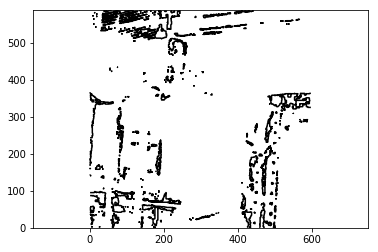

In [15]:
# read image to array
image = array(Image.open('snatch1.png').convert('L'))

# create a new figure
figure()

# show contours with origin upper left corner
contour(image, levels=[255], colors='black', origin='image')
# contour(im, origin='image')
axis('equal')

In [ ]:


img = cv2.imread('snatch1.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (40, 0, 80), (255, 255, 255))  # set to the color you want to detect

blur = cv2.blur(mask, (5, 5))

ret, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
cnts = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

cv2.imshow('blur', blur)
cv2.imshow('thresh', thresh)
cv2.imshow('cnts', cnts)

cv2.waitKey(0)

In [3]:
col = Image.open("snatch2.jpg")
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<128 else 255, '1')
bw.save("result_bw2.png")

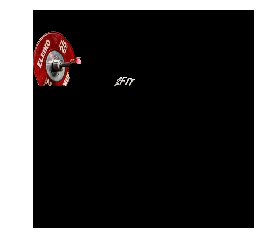

In [22]:
image_bgr = cv2.imread("snatch1.png")
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Rectange values: start x, start y, width, height
rectangle = (0, 56, 368, 150)

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]
# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()


In [43]:
# Load image as greyscale
image_gray = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

In [46]:
image_canny.shape
# plt.imshow(image_canny, cmap='gray'), plt.axis("off")
# plt.show()

(588, 597)

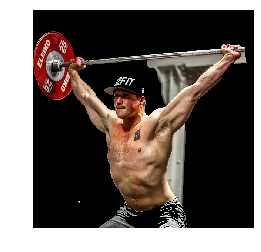

In [45]:
# Load image
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image_bgr = cv2.imread(pic)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Rectange values: start x, start y, width, height
rectangle = (1, 1, image_canny.shape[0], image_canny.shape[1])
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            7, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()